In [121]:
import pandas as pd
import numpy as np
import tushare as ts
from datetime import date, timedelta

In [122]:
earlyday = date.today() - timedelta(2000)
data = ts.get_hists(["601360"], start=str(earlyday))
# data.to_csv('sh_index.csv')

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


d:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\tushare\stock\trading.py:772: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)


In [123]:
data = data.reindex(index=data.index[::-1])
data = data.reset_index(drop=True)

In [124]:

price = data.loc[:,'close']
print(price)

0      16.55
1      16.80
2      17.74
3      17.55
4      17.22
       ...  
600    17.98
601    16.89
602    16.46
603    16.85
604    17.45
Name: close, Length: 605, dtype: float64


In [125]:
price_norm = price/max(price)
print(price_norm)

0      0.920467
1      0.934372
2      0.986652
3      0.976085
4      0.957731
         ...   
600    1.000000
601    0.939377
602    0.915462
603    0.937152
604    0.970523
Name: close, Length: 605, dtype: float64


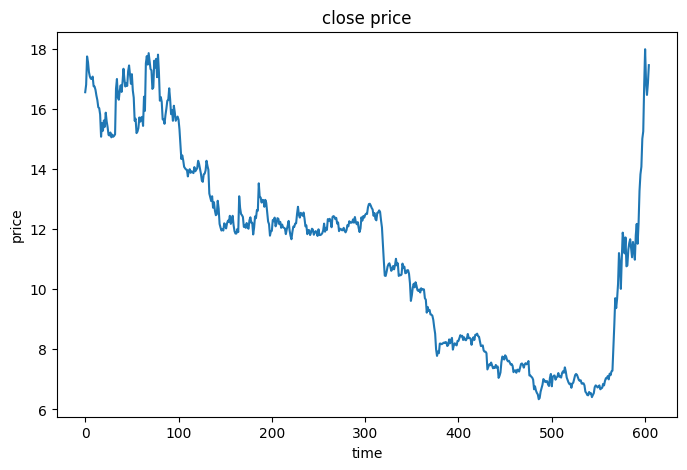

In [126]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(8,5))
plt.plot(price)
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

In [127]:
print(price)

0      16.55
1      16.80
2      17.74
3      17.55
4      17.22
       ...  
600    17.98
601    16.89
602    16.46
603    16.85
604    17.45
Name: close, Length: 605, dtype: float64


In [128]:
def extract_data(data, time_step):
    X = []
    y = []
    for i in range(len(data)-time_step):
        X.append([a for a in data[i:i+time_step]])
        y.append(data[i+time_step])
    X = np.array(X)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    return X, y


In [129]:
X, y = extract_data(price_norm, time_step=8)


In [130]:
print(X[0, :, :])

[[0.92046719]
 [0.93437152]
 [0.98665184]
 [0.97608454]
 [0.95773081]
 [0.94938821]
 [0.94549499]
 [0.94493882]]


In [131]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
model = Sequential()
model.add(SimpleRNN(units=5, input_shape=(8, 1), activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [132]:
print(X.shape, len(y))

(597, 8, 1) 597


In [133]:
y = np.array(y)

In [134]:
model.fit(X, y, batch_size=30, epochs=200)

Epoch 1/200
20/20 [==============================] - 1s 2ms/step - loss: 0.2371
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1969
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1601
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1272
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0988
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0747
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 8/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0397
Epoch 9/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 10/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 11/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 12/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 13/200
20/20 [=================

In [135]:
y_train_predict = model.predict(X)*max(price)
y_train = [i*max(price) for i in y]

19/19 [==============================] - 0s 2ms/step


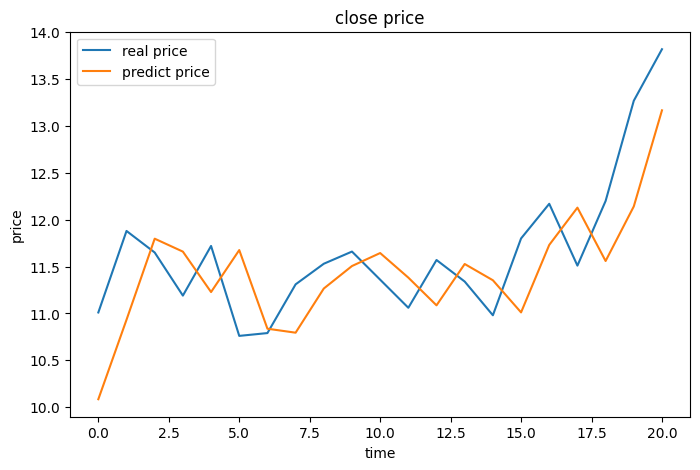

In [136]:
fig2 = plt.figure(figsize=(8,5))
plt.plot(y_train[-30:-9], label='real price')
plt.plot(y_train_predict[-30:-9], label='predict price')
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [70]:
base_price_norm = list(price_norm[-8:])
predict_norm = []
base_X = np.array(base_price_norm).reshape((1, 8, 1))
next_price = model.predict(base_X.astype(np.float64))
print(next_price)
print(next_price*max(price))


1/1 [==============================] - 0s 18ms/step
[[0.9652522]]
[[17.355234]]


In [83]:
print(y_train[-7:])
list(y_train_predict[-7:].flatten())


[15.25, 16.78, 17.98, 16.89, 16.46, 16.85, 17.45]


[14.87962, 15.194397, 16.58747, 17.804062, 16.967472, 16.495026, 16.79034]

In [18]:
base_price_norm = list(price_norm[-8:])
predict_norm = []
for i in range(30):
    base_X = np.array(base_price_norm).reshape((1, 8, 1))
    
    next_price = model.predict(base_X.astype(np.float64))
    print(next_price)
    base_price_norm.pop(0)
    base_price_norm.append(next_price[0][0])
    print(base_price_norm)
    predict_norm.append(next_price[0][0])


1/1 [==============================] - 0s 21ms/step
[[0.9395396]]
[0.9145299145299146, 0.9515669515669516, 1.0, 0.9544159544159545, 0.9373219373219374, 0.9316239316239316, 0.9487179487179488, 0.9395396]
1/1 [==============================] - 0s 17ms/step
[[0.93510896]]
[0.9515669515669516, 1.0, 0.9544159544159545, 0.9373219373219374, 0.9316239316239316, 0.9487179487179488, 0.9395396, 0.93510896]
1/1 [==============================] - 0s 17ms/step
[[0.93475]]
[1.0, 0.9544159544159545, 0.9373219373219374, 0.9316239316239316, 0.9487179487179488, 0.9395396, 0.93510896, 0.93475]
1/1 [==============================] - 0s 16ms/step
[[0.93305105]]
[0.9544159544159545, 0.9373219373219374, 0.9316239316239316, 0.9487179487179488, 0.9395396, 0.93510896, 0.93475, 0.93305105]
1/1 [==============================] - 0s 19ms/step
[[0.9301339]]
[0.9373219373219374, 0.9316239316239316, 0.9487179487179488, 0.9395396, 0.93510896, 0.93475, 0.93305105, 0.9301339]
1/1 [==============================] - 0s 17m

In [19]:
predict = [i*max(price) for i in predict_norm]

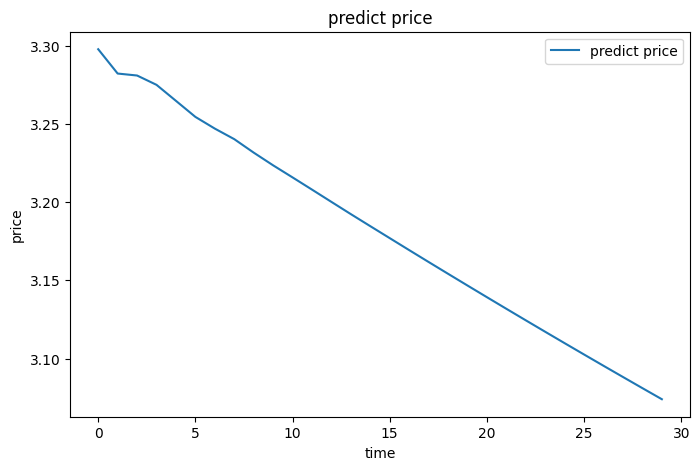

In [20]:
fig3 = plt.figure(figsize=(8,5))
plt.plot(predict, label='predict price')
plt.title('predict price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()